# Payment Date Prediction 


### Importing related Libraries 

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv("dataset60.csv")
# Displaying the first 5 rows 
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
df.isnull().mean() * 100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
49995,1.930797e+09,1930797071
49996,1.929744e+09,1929744070
49997,1.930537e+09,1930536775
49998,1.930199e+09,1930198546


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
df1 = df[['baseline_create_date','document_create_date','document_create_date.1']].copy()
df1['que'] = np.where((df['baseline_create_date'] >= df['document_create_date']) & (df['baseline_create_date'] <= df['document_create_date.1']),
                     df['baseline_create_date'] , np.nan)
df1
# so it has almost same columns

,baseline_create_date,document_create_date,document_create_date.1,que
0,20200126,20200125,20200126,20200126.0
1,20190722,20190722,20190722,20190722.0
2,20190914,20190914,20190914,20190914.0
3,20200331,20200330,20200330,NaN
4,20191113,20191113,20191113,20191113.0
...,...,...,...,...
49995,20200421,20200417,20200421,20200421.0
49996,20190815,20190814,20190815,20190815.0
49997,20200219,20200218,20200219,20200219.0
49998,20191127,20191126,20191127,20191127.0


#### Please check, Column 'posting_id' is constant columns or not


In [11]:
df.columns[df.nunique() == 1]

Index(['posting_id'], dtype='object')

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
df['isOpen'].nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
df.drop('area_business',axis=1,inplace=True)
df.drop('posting_id',axis=1,inplace=True)
df.drop('invoice_id',axis=1,inplace=True)
df.drop('document_create_date',axis=1,inplace=True)
df.drop('isOpen',axis=1,inplace=True)
df.drop('document type',axis=1,inplace=True)
df.drop('document_create_date.1',axis=1,inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df.columns
# therefore the columns are removed

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [15]:
df.loc[df.duplicated(), :]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,200915438,GROC trust,15-08-2019 00:00,2019,1929645942,25-07-2019,20190809,USD,6969.00,20190725,NAA8
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8


### Display the Number of Duplicate Rows

In [16]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [17]:
df.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [19]:
rows = len(df.axes[0])
rows

48839

In [20]:
cols = len(df.axes[1])
cols

12

### Find out the total count of null values in each columns

In [21]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [22]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [23]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [24]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'], format = '%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'])

In [25]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,1970-01-01 00:00:00.020200126,NAH4
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,1970-01-01 00:00:00.020190722,NAD1
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,1970-01-01 00:00:00.020190914,NAA8
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,1970-01-01 00:00:00.020200331,CA10
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,1970-01-01 00:00:00.020191113,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200561861,CO corporation,NaT,2020,1930797071,2020-04-21,2020-05-06,USD,3187.86,1970-01-01 00:00:00.020200421,NAA8
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,USD,6766.54,1970-01-01 00:00:00.020190815,NAH4
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,USD,6120.86,1970-01-01 00:00:00.020200219,NAA8
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,USD,63.48,1970-01-01 00:00:00.020191127,NAA8


### Please check the datatype of all the columns after conversion of the above 4 columns

In [26]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [27]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [28]:
df.loc[:,"total_open_amount"]

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [29]:
x = df[df['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.7)    

for i in x.index:
    df['total_open_amount'][i] = x[i]
df['converted_usd'] = df['total_open_amount'].copy()
   


### Display the new "converted_usd" column values

In [30]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [31]:
df = df.sort_values(by=['buisness_year']).reset_index(drop=True)

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [32]:
del df['invoice_currency']
del df['total_open_amount']

### Write a code to check the number of columns in dataframe

In [33]:
len(df.axes[1])

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [34]:
df.columns[df.isna().any()].to_list()

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [35]:
df['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [36]:
maindata = df[df['clear_date'].notnull()]

In [37]:
nulldata = df[df['clear_date'].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [38]:
print('Rows and Columns of maindata: ' + str(len(maindata.axes[0])) + ', ' + str(len(maindata.axes[1])))

Rows and Columns of maindata: 39158, 11


In [39]:
print('Rows and Columns of maindata: ' + str(len(nulldata.axes[0])) + ', ' + str(len(nulldata.axes[1])))

Rows and Columns of maindata: 9681, 11


### Display the 5 records from maindata and nulldata dataframes

In [40]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200707005,KING S co,2019-03-27,2019,1928933257,2019-12-03,2019-03-27,1970-01-01 00:00:00.020190312,NAA8,8195.840
1,CA02,140104440,SO foundation,2019-05-21,2019,2960545771,2019-03-05,2019-05-13,1970-01-01 00:00:00.020190503,CA10,56644.168
2,U001,200750051,ALBER llc,2019-05-20,2019,1929249061,2019-03-05,2019-05-18,1970-01-01 00:00:00.020190503,NAA8,84027.270
3,U001,CCU013,KRAFT F us,2019-01-11,2019,1929915061,2019-09-28,2019-09-28,1970-01-01 00:00:00.020190928,NAX2,31739.220
4,U001,200749225,SUPER associates,2019-01-29,2019,1928618224,2019-01-14,2019-01-29,1970-01-01 00:00:00.020190114,NAA8,25542.560


In [41]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
33975,U001,200769623,WAL-MAR associates,NaT,2020,1930843171,2020-01-05,2020-05-16,1970-01-01 00:00:00.020200501,NAH4,49226.33
33978,U001,CCU013,KRAFT F in,NaT,2020,1930570370,2020-02-28,2020-02-28,1970-01-01 00:00:00.020200228,NAX2,37209.64
33979,U001,200762301,C&S WH systems,NaT,2020,1930706331,2020-03-26,2020-04-10,1970-01-01 00:00:00.020200326,NAC6,45071.13
33982,U001,200711029,WEGMAN foundation,NaT,2020,1930788785,2020-04-17,2020-05-02,1970-01-01 00:00:00.020200417,NAA8,63388.07
33984,U001,200769623,WAL-MAR associates,NaT,2020,1930881323,2020-09-05,2020-05-24,1970-01-01 00:00:00.020200509,NAH4,6185.93


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [42]:
maindata['delay'] = maindata['clear_date'] - maindata['due_in_date'] 

In [43]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay
0,U001,200707005,KING S co,2019-03-27,2019,1928933257,2019-12-03,2019-03-27,1970-01-01 00:00:00.020190312,NAA8,8195.840,0 days
1,CA02,140104440,SO foundation,2019-05-21,2019,2960545771,2019-03-05,2019-05-13,1970-01-01 00:00:00.020190503,CA10,56644.168,8 days
2,U001,200750051,ALBER llc,2019-05-20,2019,1929249061,2019-03-05,2019-05-18,1970-01-01 00:00:00.020190503,NAA8,84027.270,2 days
3,U001,CCU013,KRAFT F us,2019-01-11,2019,1929915061,2019-09-28,2019-09-28,1970-01-01 00:00:00.020190928,NAX2,31739.220,-260 days
4,U001,200749225,SUPER associates,2019-01-29,2019,1928618224,2019-01-14,2019-01-29,1970-01-01 00:00:00.020190114,NAA8,25542.560,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
48829,U001,200794332,COST systems,2020-05-03,2020,1930543063,2020-02-20,2020-03-06,1970-01-01 00:00:00.020200220,NAAX,48451.410,58 days
48831,U001,200779111,NICH trust,2020-01-31,2020,1930392647,2020-01-15,2020-01-30,1970-01-01 00:00:00.020200115,NAA8,40303.400,1 days
48833,U001,200769623,WAL-MAR associates,2020-10-03,2020,1930565232,2020-02-25,2020-03-11,1970-01-01 00:00:00.020200225,NAH4,4726.630,206 days
48834,U001,200772670,ASSOCIAT associates,2020-01-22,2020,1930362244,2020-06-01,2020-01-21,1970-01-01 00:00:00.020200106,NAU5,60088.900,1 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [44]:
maindata['avg_delay']= maindata.groupby('name_customer')['delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [45]:
maindata['avg_delay'] = maindata['name_customer'].map(maindata.groupby('name_customer')['delay'].mean(numeric_only=False))

In [46]:
maindata['avg_delay']

0                 -35 days +09:00:00
1       -14 days +17:08:34.285714286
2         21 days 19:38:10.909090909
3         18 days 20:14:07.058823529
4                  -4 days +08:00:00
                    ...             
48829     15 days 19:02:36.521739130
48831               14 days 06:00:00
48833      5 days 13:45:21.951219512
48834      4 days 09:56:34.285714285
48838      3 days 00:38:22.665121668
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [47]:
st = '17 days 23:05:45'
day_time = st.split(" days ")
time = day_time[1].split(':')
print(time)
print(day_time)

['23', '05', '45']
['17', '23:05:45']


In [48]:
maindata['avg_delay'] = abs(pd.to_timedelta(maindata['avg_delay']).dt.total_seconds()) + abs(maindata['avg_delay'].dt.seconds) 

In [49]:
maindata['avg_delay']

0        3.024000e+06
1        1.209600e+06
2        1.955781e+06
3        1.700894e+06
4        3.456000e+05
             ...     
48829    1.433113e+06
48831    1.252800e+06
48833    5.310430e+05
48834    4.171883e+05
48838    2.638047e+05
Name: avg_delay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [50]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,200707005,KING S co,2019-03-27,2019,1928933257,2019-12-03,2019-03-27,1970-01-01 00:00:00.020190312,NAA8,8195.840,0 days,3.024000e+06
1,CA02,140104440,SO foundation,2019-05-21,2019,2960545771,2019-03-05,2019-05-13,1970-01-01 00:00:00.020190503,CA10,56644.168,8 days,1.209600e+06
2,U001,200750051,ALBER llc,2019-05-20,2019,1929249061,2019-03-05,2019-05-18,1970-01-01 00:00:00.020190503,NAA8,84027.270,2 days,1.955781e+06
3,U001,CCU013,KRAFT F us,2019-01-11,2019,1929915061,2019-09-28,2019-09-28,1970-01-01 00:00:00.020190928,NAX2,31739.220,-260 days,1.700894e+06
4,U001,200749225,SUPER associates,2019-01-29,2019,1928618224,2019-01-14,2019-01-29,1970-01-01 00:00:00.020190114,NAA8,25542.560,0 days,3.456000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48829,U001,200794332,COST systems,2020-05-03,2020,1930543063,2020-02-20,2020-03-06,1970-01-01 00:00:00.020200220,NAAX,48451.410,58 days,1.433113e+06
48831,U001,200779111,NICH trust,2020-01-31,2020,1930392647,2020-01-15,2020-01-30,1970-01-01 00:00:00.020200115,NAA8,40303.400,1 days,1.252800e+06
48833,U001,200769623,WAL-MAR associates,2020-10-03,2020,1930565232,2020-02-25,2020-03-11,1970-01-01 00:00:00.020200225,NAH4,4726.630,206 days,5.310430e+05
48834,U001,200772670,ASSOCIAT associates,2020-01-22,2020,1930362244,2020-06-01,2020-01-21,1970-01-01 00:00:00.020200106,NAU5,60088.900,1 days,4.171883e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [51]:
maindata.drop('delay',axis=1,inplace=True)
maindata.drop('clear_date',axis=1,inplace=True)

In [52]:
maindata

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,200707005,KING S co,2019,1928933257,2019-12-03,2019-03-27,1970-01-01 00:00:00.020190312,NAA8,8195.840,3.024000e+06
1,CA02,140104440,SO foundation,2019,2960545771,2019-03-05,2019-05-13,1970-01-01 00:00:00.020190503,CA10,56644.168,1.209600e+06
2,U001,200750051,ALBER llc,2019,1929249061,2019-03-05,2019-05-18,1970-01-01 00:00:00.020190503,NAA8,84027.270,1.955781e+06
3,U001,CCU013,KRAFT F us,2019,1929915061,2019-09-28,2019-09-28,1970-01-01 00:00:00.020190928,NAX2,31739.220,1.700894e+06
4,U001,200749225,SUPER associates,2019,1928618224,2019-01-14,2019-01-29,1970-01-01 00:00:00.020190114,NAA8,25542.560,3.456000e+05
...,...,...,...,...,...,...,...,...,...,...,...
48829,U001,200794332,COST systems,2020,1930543063,2020-02-20,2020-03-06,1970-01-01 00:00:00.020200220,NAAX,48451.410,1.433113e+06
48831,U001,200779111,NICH trust,2020,1930392647,2020-01-15,2020-01-30,1970-01-01 00:00:00.020200115,NAA8,40303.400,1.252800e+06
48833,U001,200769623,WAL-MAR associates,2020,1930565232,2020-02-25,2020-03-11,1970-01-01 00:00:00.020200225,NAH4,4726.630,5.310430e+05
48834,U001,200772670,ASSOCIAT associates,2020,1930362244,2020-06-01,2020-01-21,1970-01-01 00:00:00.020200106,NAU5,60088.900,4.171883e+05


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [53]:
 X = maindata[set(maindata.columns) - set(['avg_delay'])]

In [54]:
y =  maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [55]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(
 X, y, test_size=0.4)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [56]:
print("X_train" + str(X_train.shape))
print("X_loc_test" + str(X_loc_test.shape))
print("y_train" + str(y_train.shape))
print("y_loc_test" + str(y_loc_test.shape))

X_train(23494, 10)
X_loc_test(15664, 10)
y_train(23494,)
y_loc_test(15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [57]:
X_val, X_test, y_val,y_test = train_test_split(
 X_loc_test, y_loc_test, test_size=0.5)

### Please check for the number of rows and columns of all the 4 dataframes 

In [58]:
print("X_val" + str(X_val.shape))
print("X_test" + str(X_test.shape))
print("y_val" + str(y_val.shape))
print("y_test" + str(y_test.shape))

X_val(7832, 10)
X_test(7832, 10)
y_val(7832,)
y_test(7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

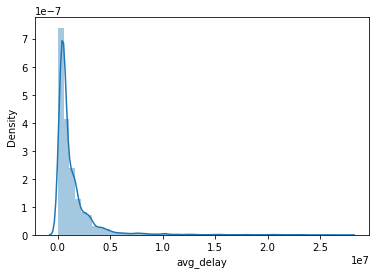

In [59]:
sns.distplot(y)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [60]:
x_train = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [61]:
x_train

,name_customer,doc_id
0,17135 associates,1
1,17135 llc,1
2,236008 associates,1
3,99 CE,2
4,99 CE associates,1
...,...,...
3070,YEN BROS corp,1
3071,YEN BROS corporation,1
3072,YEN BROS llc,1
3073,ZARCO co,1


### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

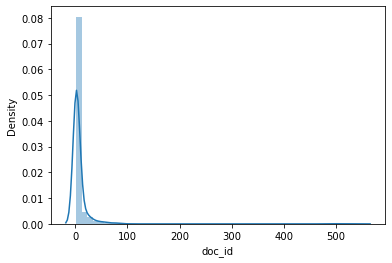

In [62]:
sns.distplot(x_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

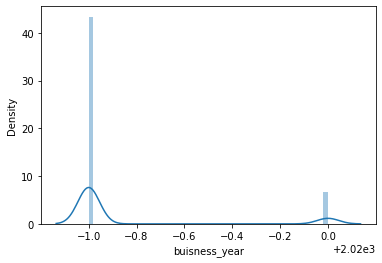

In [63]:
sns.distplot(X_train['buisness_year'])

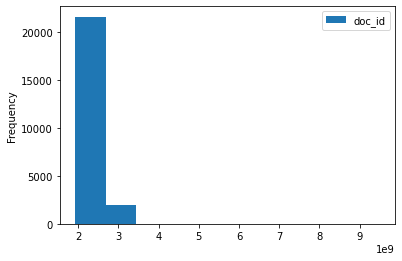

In [65]:
X_train.plot(x='buisness_year', y='doc_id', kind='hist')
X_train.buisness_year.value_counts()
plt.show()

# Feature Engineering 

### Display and describe the X_train dataframe 

In [66]:
X_train

,due_in_date,baseline_create_date,doc_id,business_code,cust_payment_terms,converted_usd,name_customer,posting_date,cust_number,buisness_year
2837,2019-09-21,1970-01-01 00:00:00.020190906,1929851305,U001,NAA8,44910.360,RUIZ F systems,2019-06-09,200212683,2019
3999,2019-03-26,1970-01-01 00:00:00.020190316,1928986299,U001,NAM2,6196.870,DECA associates,2019-03-19,200230690,2019
10351,2019-06-26,1970-01-01 00:00:00.020190611,1929459274,U001,NAH4,15770.820,WAL-MAR in,2019-11-06,200769623,2019
17583,2019-12-04,1970-01-01 00:00:00.020191030,1930063190,U001,NAG2,18766.810,KRAFT foundation,2019-10-30,CCCA02,2019
12526,2019-02-25,1970-01-01 00:00:00.020190215,2960527808,CA02,CA10,48930.854,FEDER us,2019-06-02,140104240,2019
...,...,...,...,...,...,...,...,...,...,...
8892,2019-02-25,1970-01-01 00:00:00.020190210,1928767337,U001,NAH4,13686.240,WAL-MAR in,2019-10-02,200769623,2019
28555,2019-10-01,1970-01-01 00:00:00.020190916,1929875091,U001,NAA8,57461.950,SUPE trust,2019-09-16,200936373,2019
20199,2019-06-22,1970-01-01 00:00:00.020190607,1929435833,U001,NAH4,55693.920,WAL-MAR,2019-07-06,200769623,2019
6660,2019-08-12,1970-01-01 00:00:00.020190802,2960569148,CA02,CA10,17734.605,SYSC corporation,2019-01-08,140105686,2019


In [67]:
X_train.describe()

,doc_id,converted_usd,buisness_year
count,2.349400e+04,23494.000000,23494.000000
mean,2.015769e+09,30697.990318,2019.132757
std,2.981566e+08,36841.732651,0.339319
min,1.928502e+09,0.790000,2019.000000
25%,1.929180e+09,4557.082500,2019.000000
50%,1.929739e+09,16842.050000,2019.000000
75%,1.930213e+09,45127.845000,2019.000000
max,9.500000e+09,668593.360000,2020.000000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [68]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [69]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [70]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [71]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
2837,U001,1
3999,U001,1
10351,U001,1
17583,U001,1
12526,CA02,0
...,...,...
8892,U001,1
28555,U001,1
20199,U001,1
6660,CA02,0


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [72]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [73]:
X_train ,X_val, X_test= custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [74]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [75]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [76]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [77]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [78]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [79]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [80]:
X_train.dtypes

due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
doc_id                             int64
converted_usd                    float64
posting_date              datetime64[ns]
cust_number                        int32
buisness_year                      int64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [81]:
X_val.dtypes

due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
doc_id                             int64
converted_usd                    float64
posting_date              datetime64[ns]
cust_number                        int32
buisness_year                      int64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [82]:
X_test.dtypes

due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
doc_id                             int64
converted_usd                    float64
posting_date              datetime64[ns]
cust_number                        int32
buisness_year                      int64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [83]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [84]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [85]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [86]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [87]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [88]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [89]:
X_train.dtypes

doc_id                      int64
converted_usd             float64
cust_number                 int32
buisness_year               int64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [90]:
X_val.dtypes

doc_id                      int64
converted_usd             float64
cust_number                 int32
buisness_year               int64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [91]:
 X_test.dtypes

doc_id                      int64
converted_usd             float64
cust_number                 int32
buisness_year               int64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [92]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

13

- Note - Keep the code as it is, no need to change 


In [93]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

3


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [94]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

1


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [95]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [96]:
train=X_train.copy()
handling_correlation(train.copy(), 0.85)

['year_of_due', 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

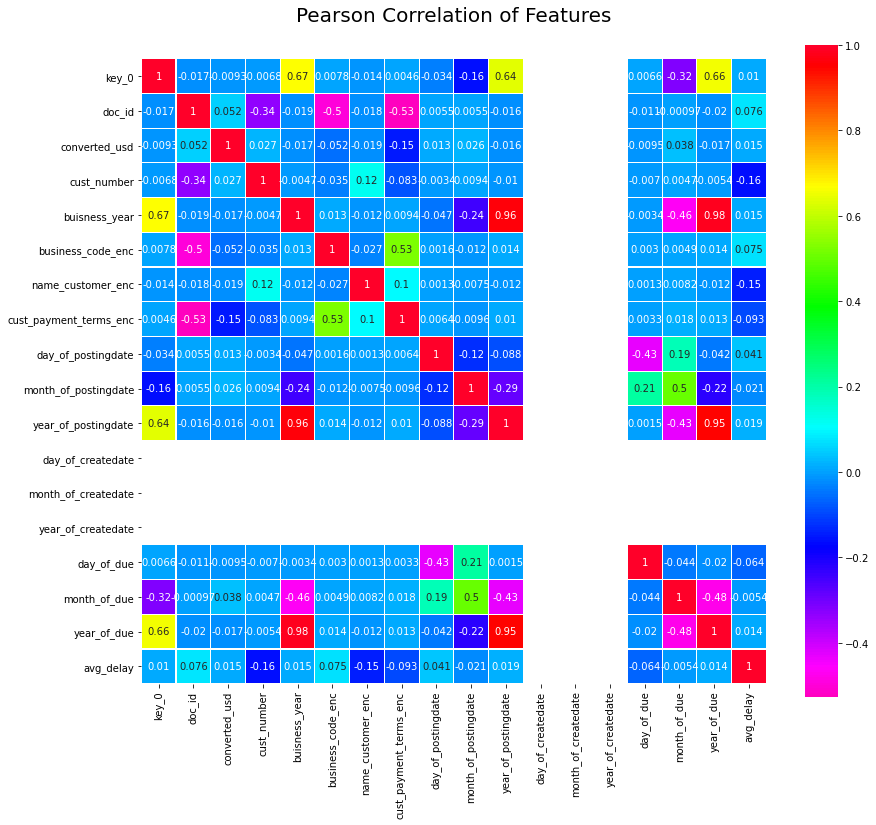

In [97]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [98]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [99]:
sel.variances_

array([8.88935883e+16, 1.35725549e+09, 1.76031544e+15, 1.15132799e-01,
       2.89733502e-01, 1.05972931e+06, 1.22709361e+02, 8.20072376e+01,
       1.19077926e+01, 1.14766763e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.57138430e+01, 1.21526851e+01, 1.18256659e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [100]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2024591.5953676843

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regressor')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

## You need to make the comparison list into a comparison dataframe 

In [ ]:
comparator = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns =['Algorithm', 'MSE_Score', 'R2_Score'])
comparator

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val,predictedfinal,squared=False)

### Calculate the R2 score for test

In [ ]:
r2_score(y_test,predictedfinal)

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val,predict_testfinal)

### Calculate the Accuracy for train Dataset 

In [ ]:
regressorfinal.score(X_train,y_train)

### Calculate the accuracy for validation

In [ ]:
regressorfinal.score(X_val,y_val)

### Calculate the accuracy for test

In [ ]:
regressorfinal.score(X_test,y_test)

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

The model we are selecting is Xgboost beacuse it gives more accurate result with shuffled data as compared to random forest 

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [ ]:
nulldata

### Check for the number of rows and columns in the nulldata

In [ ]:
print('Rows and Columns of nulldata: ' + str(len(nulldata.axes[0])) + ', ' + str(len(nulldata.axes[1])))

### Check the Description and Information of the nulldata 

In [ ]:
nulldata.describe()

In [ ]:
nulldata.info()

### Storing the Nulldata into a different dataset 
# for BACKUP

In [ ]:
nulldata1 =nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [ ]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_createdate'] = nulldata['clear_date'].dt.month
nulldata['year_of_createdate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] =nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year



### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [ ]:
nulldata.dtypes

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
nulldata.drop('business_code',axis=1,inplace=True)
nulldata.drop('baseline_create_date',axis=1,inplace=True)
nulldata.drop('due_in_date',axis=1,inplace=True)
nulldata.drop('posting_date',axis=1,inplace=True)
nulldata.drop('clear_date',axis=1,inplace=True)
nulldata.drop('cust_payment_terms',axis=1,inplace=True)
nulldata.drop('day_of_cleardate',axis=1,inplace=True)
nulldata.drop('year_of_cleardate',axis=1,inplace=True)
nulldata.drop('name_customer',axis=1,inplace=True)
nulldata.drop('month_of_cleardate',axis=1,inplace=True)

### Check the information of the "nulldata" dataframe

In [ ]:
nulldata.info()

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [ ]:
X_test.info()

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

In [ ]:
nulldata.columns

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [ ]:
nulldata2

### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [ ]:
Final

### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
print('Rows and Columns of nulldata: ' + str(len(Final.axes[0])) + ', ' + str(len(Final.axes[1])))

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date']

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [ ]:
Final['avg_delay']

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:

bins =  [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final.drop('key_0',axis=1,inplace=True)
Final.drop('avg_delay',axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
Final['Aging Bucket'].value_counts()

### Display your final dataset with aging buckets 

In [ ]:
Final

### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('HRC61831WK_ANAVIL_ABHISHEK_OJHA.csv')

# END OF THE PROJECT